In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from matplotlib import colors

In [2]:
def plot_from_npy(npy_file, save_path=None):
    data = np.load(npy_file)
    fig, ax = plt.subplots(1,1, figsize=(5, 4))

    cmap = mpl.cm.get_cmap("jet").copy()
    cmap.set_under(color='white')
    
    imag = ax.imshow(data.sum(axis=0)[:,:,0].transpose() / data.shape[0], extent=[-1, 1, -1, 1], aspect='equal', norm=colors.SymLogNorm(linthresh=0.0001, linscale=0.1, vmin=1e-2, vmax=1e1), cmap=cmap, origin='lower')
    cbar = plt.colorbar(imag, ax=ax, shrink=0.9)

    ax.set_xlabel(r'$\eta^\prime$') 
    ax.set_ylabel(r'$\phi^\prime$')

    cbar.set_label(r'$ p_{\mathrm{T}}$ [GeV]', rotation=90, labelpad=5)

    if save_path:
        plt.savefig(save_path, dpi=300, facecolor='White', bbox_inches='tight')

    plt.show()

    return data.sum(axis=0)[:,:,0].transpose() / data.shape[0]

def plot_jet_image(data, save_path=None):
    fig, ax = plt.subplots(1,1, figsize=(5, 4))

    cmap = mpl.cm.get_cmap("jet").copy()
    cmap.set_under(color='white')

    imag = ax.imshow(data, extent=[-1.0, 1.0, -1.0, 1.0], norm=colors.SymLogNorm(linthresh=0.0001, linscale=0.1, vmin=1e-3, vmax=1e3), cmap=cmap, origin='lower')
    cbar = plt.colorbar(imag, ax=ax, shrink=0.9)

    ax.set_xlabel(r'$\eta^\prime$') 
    ax.set_ylabel(r'$\phi^\prime$')

    cbar.set_label(r'$ p_{\mathrm{T}}$ [GeV]', rotation=90, labelpad=5)

    if save_path:
        plt.savefig(save_path, dpi=300, facecolor='White', bbox_inches='tight')

    plt.show()

    return data

In [3]:
def plot_image_on_axis(data, ax):
    cmap = mpl.cm.get_cmap("jet").copy()
    cmap.set_under(color='white')

    imag = ax.imshow(data, extent=[-5, 5, -np.pi, np.pi], aspect=5/np.pi, norm=colors.SymLogNorm(linthresh=0.0001, linscale=0.1, vmin=1e-1, vmax=1e3), cmap=cmap, origin='lower')
    cbar = plt.colorbar(imag, ax=ax, shrink=0.9)
    
    cbar.set_label(r'$ p_{\mathrm{T}}$ [GeV]', rotation=90, labelpad=5)

    ax.set_xlabel(r'$\eta$') 
    ax.set_ylabel(r'$\phi^\prime$')

# Event image

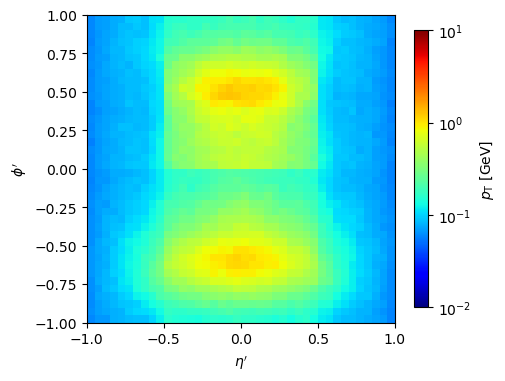

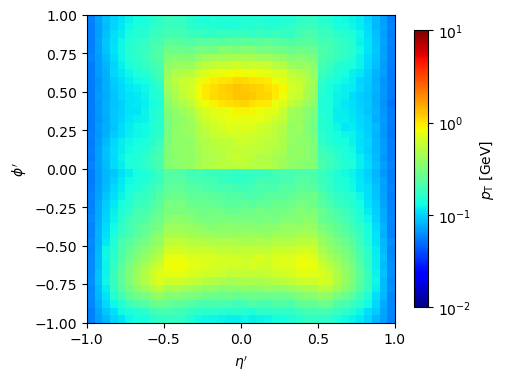

In [4]:
data_origin_bkg = plot_from_npy('./data/mjj_cut/pre-processing/40x40/GGF_in_BR-data.npy')
data_origin_sig = plot_from_npy('./data/mjj_cut/pre-processing/40x40/VBF_in_SR-data.npy')

## GGF

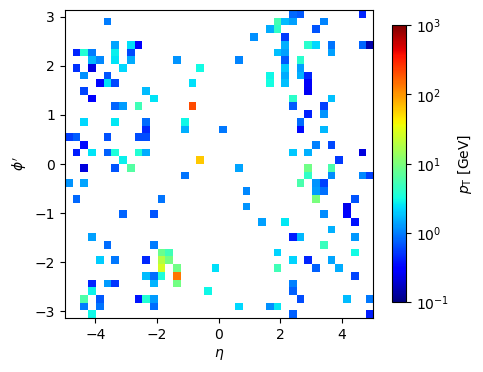

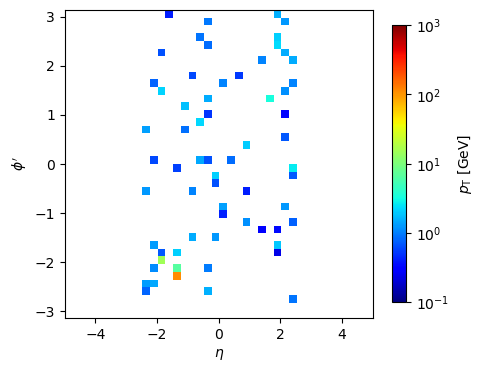

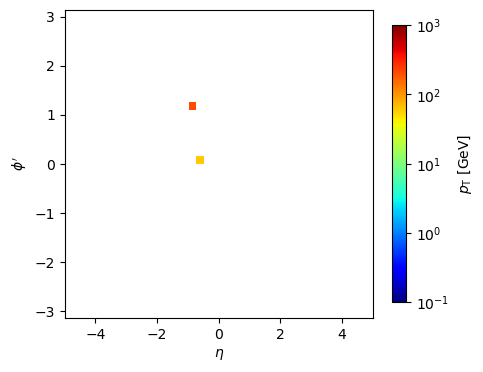

In [5]:
data = np.load('./data/mjj_cut/pre-processing/40x40/GGF_in_BR-data.npy')
event = 2
fig, ax = plt.subplots(1, 1, figsize=(5, 4))

plot_image_on_axis(data[event, :, :, 0].transpose(), ax)
    
# 調整子圖間的水平間距
plt.subplots_adjust(wspace=0.25)
plt.savefig('../figures/event_image_GGF-tower.pdf', dpi=300, facecolor='White', bbox_inches='tight')
plt.show()


fig, ax = plt.subplots(1, 1, figsize=(5, 4))

plot_image_on_axis(data[event, :, :, 1].transpose(), ax)
    
# 調整子圖間的水平間距
plt.subplots_adjust(wspace=0.25)
plt.savefig('../figures/event_image_GGF-track.pdf', dpi=300, facecolor='White', bbox_inches='tight')
plt.show()


fig, ax = plt.subplots(1, 1, figsize=(5, 4))

plot_image_on_axis(data[event, :, :, 2].transpose(), ax)
    
# 調整子圖間的水平間距
plt.subplots_adjust(wspace=0.25)
plt.savefig('../figures/event_image_GGF-photon.pdf', dpi=300, facecolor='White', bbox_inches='tight')
plt.show()

## VBF

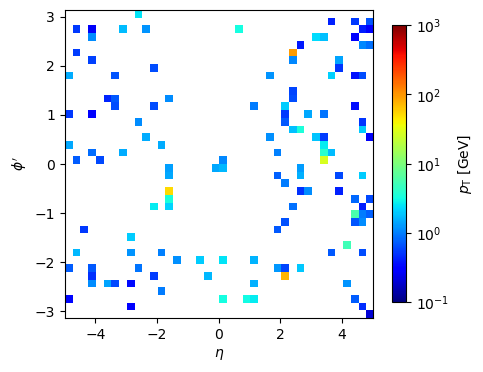

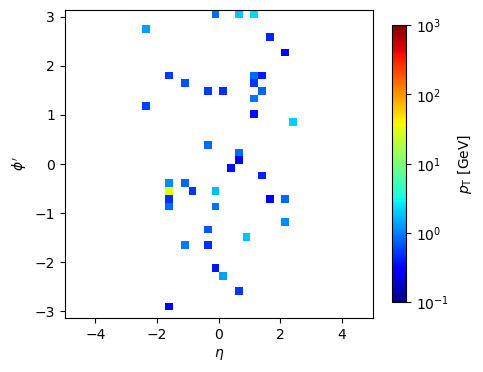

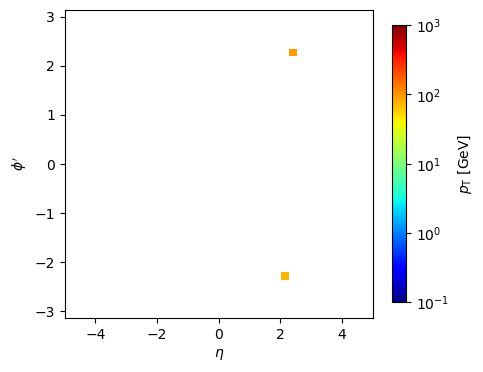

In [6]:
data = np.load('./data/mjj_cut/pre-processing/40x40/VBF_in_SR-data.npy')
event = 7
fig, ax = plt.subplots(1, 1, figsize=(5, 4))

plot_image_on_axis(data[event, :, :, 0].transpose(), ax)
    
# 調整子圖間的水平間距
plt.subplots_adjust(wspace=0.25)
plt.savefig('../figures/event_image_VBF-tower.pdf', dpi=300, facecolor='White', bbox_inches='tight')
plt.show()


fig, ax = plt.subplots(1, 1, figsize=(5, 4))

plot_image_on_axis(data[event, :, :, 1].transpose(), ax)
    
# 調整子圖間的水平間距
plt.subplots_adjust(wspace=0.25)
plt.savefig('../figures/event_image_VBF-track.pdf', dpi=300, facecolor='White', bbox_inches='tight')
plt.show()


fig, ax = plt.subplots(1, 1, figsize=(5, 4))

plot_image_on_axis(data[event, :, :, 2].transpose(), ax)
    
# 調整子圖間的水平間距
plt.subplots_adjust(wspace=0.25)
plt.savefig('../figures/event_image_VBF-photon.pdf', dpi=300, facecolor='White', bbox_inches='tight')
plt.show()

# $p_\text{T}$ smearing

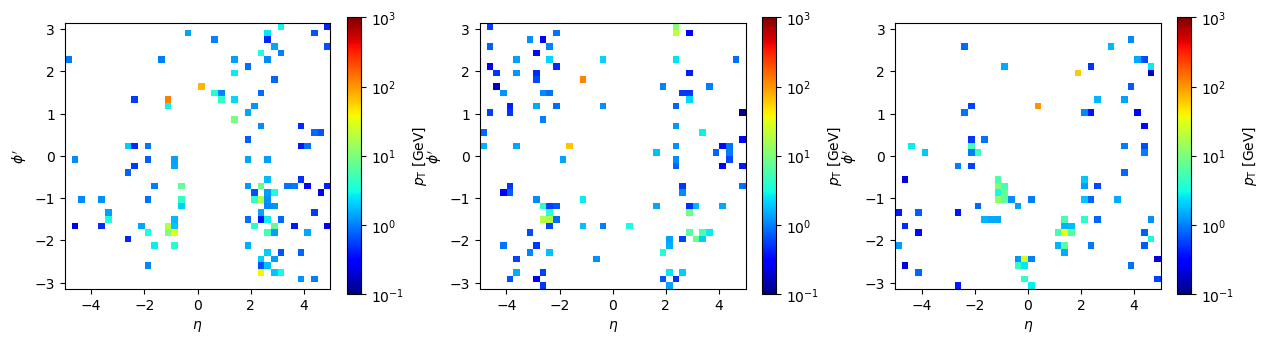

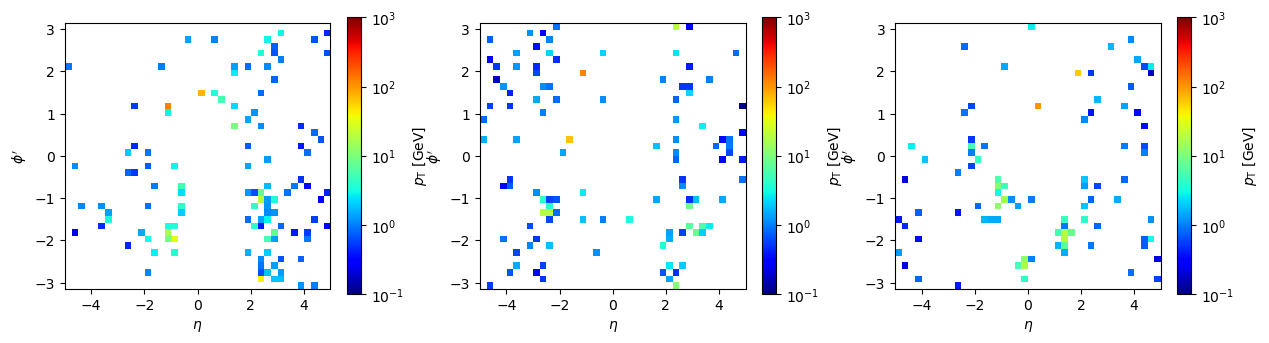

In [5]:
# Get original and augmented jet image from npy file
data = np.load('./data/quark_jet_2_cut/pre-processing/40x40/GGF_in_BR-data.npy')

original_size = data.shape[0]
events = np.array([0, 22, 96])
n = len(events)


fig, ax = plt.subplots(1, n, figsize=(5*n, 4))
for i in range(n):
    event = events[i]
    plot_image_on_axis(data[event, :, :, 0].transpose(), ax[i])
    
# 調整子圖間的水平間距
plt.subplots_adjust(wspace=0.25)
# plt.savefig('../figures/HVmodel_jet_image_eta_phi_smearing_01.pdf', dpi=300, facecolor='White', bbox_inches='tight')
plt.show()


data = np.load('./data/quark_jet_2_cut/pT_smearing/40x40/01/GGF_in_BR-data.npy')

fig, ax = plt.subplots(1, n, figsize=(5*n, 4))

for i in range(n):
    event = events[i]
    plot_image_on_axis(data[event, :, :, 0].transpose(), ax[i])

# 調整子圖間的水平間距
plt.subplots_adjust(wspace=0.25)
# plt.savefig('../figures/HVmodel_jet_image_eta_phi_smearing_02.pdf', dpi=300, facecolor='White', bbox_inches='tight')
plt.show()